# Clean and analyze exit surveys

In this project we will work with two exit surveys from employees.
1. Department of Education, Training and Employment (DETE) the dataset can be donloaded [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)
2. Technical and Further Education (TAFE) the dataset can be downloaded [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)

We try to answer the folowing questions:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? 
* What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?



In [1]:
import pandas as pd
import numpy as np

__Read and explore the datasets__

In [2]:
dete = pd.read_csv("dete_survey.csv")
dete.head()  

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


The dete dataset has "Not Stated" in the start date column we should read this in as nan

In [3]:
dete = pd.read_csv("dete_survey.csv", na_values = 'Not Stated')
dete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

In [4]:
tafe = pd.read_csv("tafe_survey.csv")
tafe.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


Get information on all columns

In [5]:
tafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

__Check if columns have missing values__

In [6]:
dete.isnull().sum().sort_values(ascending = False)

Torres Strait                          819
South Sea                              815
Aboriginal                             806
Disability                             799
NESB                                   790
Business Unit                          696
Classification                         367
Region                                 105
Role Start Date                         98
Opportunities for promotion             87
Career Aspirations                      76
DETE Start Date                         73
Wellness programs                       56
Coach                                   55
Further PD                              54
Cease Date                              34
Workplace issue                         34
Feedback                                30
Health & Safety                         29
Gender                                  24
Professional Development                14
Stress and pressure support             12
Skills                                  11
Age        

In [7]:
tafe.isnull().sum().sort_values(ascending = False)

Main Factor. Which of these was the main factor for leaving?     589
InductionInfo. Topic:Did you undertake a Corporate Induction?    270
Contributing Factors. Ill Health                                 265
Contributing Factors. Maternity/Family                           265
Contributing Factors. Career Move - Public Sector                265
                                                                ... 
CESSATION YEAR                                                     7
Reason for ceasing employment                                      1
WorkArea                                                           0
Institute                                                          0
Record ID                                                          0
Length: 72, dtype: int64

__Check all columns for values to help decide which to keep__

In [8]:
for c in dete.columns:
    print("\n")
    print(c,"\n",dete[c].value_counts(dropna = False))



ID 
 823    1
270    1
280    1
279    1
278    1
      ..
546    1
545    1
544    1
543    1
1      1
Name: ID, Length: 822, dtype: int64


SeparationType 
 Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64


Cease Date 
 2012       344
2013       200
01/2014     43
12/2013     40
NaN         34
09/2013     34
06/2013     27
07/2013     22
10/2013     20
11/2013     16
08/2013     12
05/2013      7
05/2012      6
07/2014      2
04/2013      2
04/2014      2
02/2014      2
08/2012      2
2014         1
07/2006      1
09/2014      1
07/2012      1
2010         1
09/2010      1
11/2012      1
Name: Cease Date, 

Name: Gender, dtype: int64


Age 
 61 or older      222
56-60            174
51-55            103
46-50             63
41-45             61
26-30             57
36-40             51
21-25             40
31-35             39
NaN               11
20 or younger      1
Name: Age, dtype: int64


Aboriginal 
 NaN    806
Yes     16
Name: Aboriginal, dtype: int64


Torres Strait 
 NaN    819
Yes      3
Name: Torres Strait, dtype: int64


South Sea 
 NaN    815
Yes      7
Name: South Sea, dtype: int64


Disability 
 NaN    799
Yes     23
Name: Disability, dtype: int64


NESB 
 NaN    790
Yes     32
Name: NESB, dtype: int64


In [9]:
for c in tafe.columns:
    print("\n")
    print(c,"\n",tafe[c].value_counts(dropna = False))



Record ID 
 6.342194e+17    1
6.349929e+17    1
6.342081e+17    1
6.345951e+17    1
6.341719e+17    1
               ..
6.348914e+17    1
6.342080e+17    1
6.349520e+17    1
6.342684e+17    1
6.341820e+17    1
Name: Record ID, Length: 702, dtype: int64


Institute 
 Brisbane North Institute of TAFE         161
Southern Queensland Institute of TAFE    142
Central Queensland Institute of TAFE     108
Sunshine Coast Institute of TAFE          91
Tropical North Institute of TAFE          70
SkillsTech Australia                      57
Southbank Institute of Technology         43
Barrier Reef Institute of TAFE            14
Mount Isa Institute of TAFE               12
Wide Bay Institute of TAFE                 2
The Bremer Institute of TAFE               1
Metropolitan South Institute of TAFE       1
Name: Institute, dtype: int64


WorkArea 
 Non-Delivery (corporate)    432
Delivery (teaching)         270
Name: WorkArea, dtype: int64


CESSATION YEAR 
 2011.0    268
2012.0    235
2010.0  

WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job 
 Agree                230
Strongly Agree       134
Disagree              96
NaN                   93
Neutral               91
Strongly Disagree     52
Not Applicable         6
Name: WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job, dtype: int64


WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT] 
 Agree                232
Strongly Agree       129
Neutral               95
Disagree              94
NaN                   94
Strongly Disagree     52
Not Applicable         6
Name: WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT], dtype: int64


WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job 
 Agree                237
Strongly Agre

# Drop columns we do not need from dataframe

when inspecting all columns we notice that we don\`t need several columns for our research.

In [10]:
drop_dete = dete.columns[28:49]
drop_tafe = tafe.columns[17:66]

dete_updated = dete.drop(drop_dete, axis = 1)
tafe_updated = tafe.drop(drop_tafe, axis = 1)

Now we need to clean both dataset all columns need to be lower case and in proper format. The goal is to combine both in one dataframe in the end.

In [11]:
dete_updated.columns = dete_updated.columns.str.lower()
dete_updated.columns = dete_updated.columns.str.replace("-", "to")
dete_updated.columns = dete_updated.columns.str.replace(" ", "_")
dete_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

Now it is time for the tafe dataset

In [12]:
tafe_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

We create a dictionary to map replacement values

In [13]:
mapping = {
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}
tafe_updated = tafe_updated.rename(mapping, axis = 1)

In [14]:
tafe_updated.columns = tafe_updated.columns.str.replace('Contributing Factors. ', "").str.lower()
tafe_updated.columns = tafe_updated.columns.str.replace("-", "to")
tafe_updated.columns = tafe_updated.columns.str.replace(" ", "_")
tafe_updated.columns = tafe_updated.columns.str.replace("sector_", "sector")
tafe_updated.columns

Index(['id', 'institute', 'workarea', 'cease_date', 'separationtype',
       'career_move_to_public_sector', 'career_move_to_private_sector',
       'career_move_to_selftoemployment', 'ill_health', 'maternity/family',
       'dissatisfaction', 'job_dissatisfaction', 'interpersonal_conflict',
       'study', 'travel', 'other', 'none', 'gender', 'age',
       'employment_status', 'position', 'institute_service', 'role_service'],
      dtype='object')

__After the column names we start investigating contents of the columns__

We start with the column cease date and see the year value in different formats. Also there are some empty values which we need to remove. Also we make sure that the columns that need to be combined are in the same datatype.

In [15]:
dete_updated["cease_date"].value_counts(dropna = False).sort_values()

11/2012      1
2010         1
07/2012      1
09/2014      1
07/2006      1
2014         1
09/2010      1
08/2012      2
02/2014      2
04/2014      2
04/2013      2
07/2014      2
05/2012      6
05/2013      7
08/2013     12
11/2013     16
10/2013     20
07/2013     22
06/2013     27
09/2013     34
NaN         34
12/2013     40
01/2014     43
2013       200
2012       344
Name: cease_date, dtype: int64

In [16]:
pattern = r"([1-2][0-9]{3})"
dete_updated["cease_date"] = dete_updated["cease_date"].astype(str).str.extract(pattern)
dete_updated =dete_updated[dete_updated["cease_date"].notnull()]
dete_updated = dete_updated[dete_updated["role_start_date"]> 1900]
dete_updated['cease_date'] =dete_updated['cease_date'].astype(int)
dete_updated["cease_date"].value_counts().sort_values()

2006      1
2010      2
2014     49
2012    310
2013    334
Name: cease_date, dtype: int64

Next the start date which has an obvious false entry . We decide to discard this one.

In [17]:
dete_updated = dete_updated[dete_updated["dete_start_date"].notnull()]
dete_updated["dete_start_date"] = dete_updated["dete_start_date"].astype(int)
dete_updated["dete_start_date"].value_counts(dropna = False).sort_index()

1963     4
1965     1
1966     1
1967     1
1968     3
1969     9
1970    20
1971     9
1972    11
1973     7
1974    13
1975    19
1976    14
1977     9
1978    13
1979    13
1980    14
1981     8
1982     4
1983     9
1984     8
1985     7
1986    12
1987     6
1988    14
1989    15
1990    14
1991    16
1992    17
1993    13
1994    10
1995    13
1996    18
1997    14
1998    12
1999    19
2000    14
2001    10
2002    14
2003    15
2004    17
2005    19
2006    18
2007    33
2008    30
2009    24
2010    27
2011    37
2012    26
2013    18
Name: dete_start_date, dtype: int64

__Separation type__ <br>
Because our investigation focussus on people that resigned we create a new dataframe with .copy method . We filter separation type containing "resignation

In [18]:
dete_resigned = dete_updated[dete_updated["separationtype"].str.lower().str.contains("resignation")].copy()
dete_resigned["separationtype"].value_counts(dropna = False)

Resignation-Other reasons               125
Resignation-Other employer               78
Resignation-Move overseas/interstate     59
Name: separationtype, dtype: int64

We check if there are any rows with end date smaller than start date and create new column employent_duration

In [19]:
dete_resigned[dete_resigned["cease_date"]< dete_resigned["dete_start_date"]]

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb


In [20]:
dete_resigned["employment_duration"] = dete_resigned["cease_date"]- dete_resigned["dete_start_date"]

In [21]:
tafe_updated = tafe_updated[tafe_updated["separationtype"].notnull()]
tafe_updated["separationtype"].value_counts(dropna = False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [22]:
tafe_resigned = tafe_updated[tafe_updated["separationtype"].str.lower().str.contains("resignation")].copy()
tafe_resigned["separationtype"].value_counts(dropna = False)

Resignation    340
Name: separationtype, dtype: int64

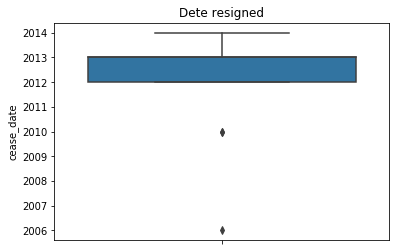

In [23]:
%matplotlib inline  
import matplotlib.pyplot as plt
import seaborn as sns
plt.yticks(np.arange(2005, 2015, 1)) 
plt.title("Dete resigned")
sns.boxplot(y = dete_resigned[ "cease_date"])

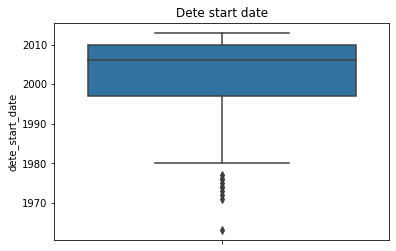

In [24]:
plt.title("Dete start date")
sns.boxplot(y = dete_resigned[ "dete_start_date"])

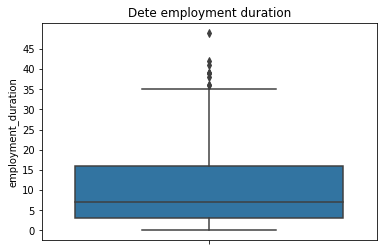

In [25]:
plt.title("Dete employment duration")
plt.yticks(np.arange(0,50 , 5)) 
sns.boxplot(y = dete_resigned["employment_duration"] )

The average amount of years working at Dete is 7 years but the distrubution is quite wide

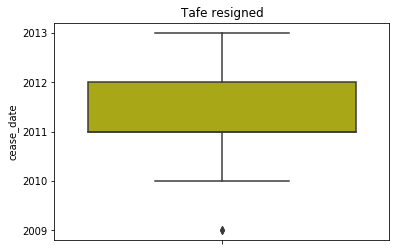

In [26]:
plt.yticks(np.arange(2005,2015 , 1)) 
plt.title("Tafe resigned")
sns.boxplot(y = tafe_resigned["cease_date"], color = "y" )

When we look at the data we see that most people resigned between 2012-2013 in the dete dataset and 2011-2012 in the tafe dataset

## Our research focussus on being dissatisfied. We will filter the columns before combining the datasets

dete_resigned:
* job_dissatisfaction
* dissatisfaction_with_the_department
* physical_work_environment
* lack_of_recognition
* lack_of_job_security
* work_location
* employment_conditions
* work_life_balance
* workload

tafe_resigned:
* dissatisfaction
* job_dissatisfaction

In [27]:
dissatisfied_dete = ['job_dissatisfaction','dissatisfaction_with_the_department', 
'physical_work_environment',
'lack_of_recognition',
'lack_of_job_security',
'work_location',
'employment_conditions',
'work_life_balance',
'workload']
for c in dete_resigned[dissatisfied_dete]:
    print("\n",dete_resigned[c].value_counts(dropna = False))


 False    226
True      36
Name: job_dissatisfaction, dtype: int64

 False    234
True      28
Name: dissatisfaction_with_the_department, dtype: int64

 False    256
True       6
Name: physical_work_environment, dtype: int64

 False    235
True      27
Name: lack_of_recognition, dtype: int64

 False    250
True      12
Name: lack_of_job_security, dtype: int64

 False    247
True      15
Name: work_location, dtype: int64

 False    243
True      19
Name: employment_conditions, dtype: int64

 False    201
True      61
Name: work_life_balance, dtype: int64

 False    238
True      24
Name: workload, dtype: int64


This looks good no missing values we can use df.any with axis 1 (horizontal) to check if there is a column with a true value

In [28]:
dete_resigned['dissatisfied'] = dete_resigned[dissatisfied_dete].any(axis = 1, skipna=False)
dete_resigned['dissatisfied'].value_counts()                                                                     

True     132
False    130
Name: dissatisfied, dtype: int64

In [29]:
print(tafe_resigned['dissatisfaction'].value_counts(dropna=False))
print(tafe_resigned['job_dissatisfaction'].value_counts(dropna=False))

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
NaN                      8
Name: job_dissatisfaction, dtype: int64


In [30]:
tafe_resigned['dissatisfaction']= tafe_resigned['dissatisfaction'].str.replace("Contributing Factors. Dissatisfaction", "1")
tafe_resigned['dissatisfaction']= tafe_resigned['dissatisfaction'].str.replace("-", "0")
tafe_resigned['dissatisfaction']= tafe_resigned['dissatisfaction'].fillna("0")
tafe_resigned['job_dissatisfaction'] = tafe_resigned['job_dissatisfaction'].str.replace("Job Dissatisfaction", "1")
tafe_resigned['job_dissatisfaction'] = tafe_resigned['job_dissatisfaction'].str.replace("-", "0")
tafe_resigned['job_dissatisfaction'] = tafe_resigned['job_dissatisfaction'].fillna("0")

In [31]:
print(tafe_resigned['dissatisfaction'].value_counts(dropna=False))
print(tafe_resigned['job_dissatisfaction'].value_counts(dropna=False)) 

0     285
1      55
Name: dissatisfaction, dtype: int64
0    278
1     62
Name: job_dissatisfaction, dtype: int64


In [32]:
cols = ['dissatisfaction','job_dissatisfaction']
tafe_resigned['dissatisfied'] = tafe_resigned[cols].astype(int).any( axis = 1)

In [33]:
tafe_resigned['dissatisfied'].value_counts()

False    249
True      91
Name: dissatisfied, dtype: int64

In [34]:
dete_employment_short = dete_resigned[dete_resigned["employment_duration"] < 4]
dete_employment_long = dete_resigned[dete_resigned["employment_duration"] > 9]
perc_short = round(dete_employment_short['dissatisfied'].sum()/len(dete_employment_short)*100,2)
perc_long = round(dete_employment_long['dissatisfied'].sum()/len(dete_employment_long)*100,2)

print("Percentage resigned after working  3 years or less and dissatisfied : ", perc_short, "%")
print("Percentage resigned after working 10 years or more and dissatisfied : ", perc_long, "%")

Percentage resigned after working  3 years or less and dissatisfied :  38.16 %
Percentage resigned after working 10 years or more and dissatisfied :  54.55 %


__Compare age and dissatisfied rates__

We need to clean up the ages columns before we can combine the datasets. For age ranges we take the middle value .
    
    
    
    

In [35]:
dete_resigned['age'].value_counts(dropna=False)

41-45            43
36-40            35
26-30            30
31-35            29
51-55            29
46-50            28
21-25            26
56-60            22
61 or older      17
NaN               2
20 or younger     1
Name: age, dtype: int64

In [36]:
age_map = {"41-45" :  43, "36-40" :38,
"26-30":28,
"51-55":53,
"31-35":33,
"46-50":48,
"21-25":23,
"56-60":58,
"61 or older":61,
"20 or younger":20}
dete_resigned['age'] =dete_resigned['age'].map(age_map)

In [37]:
dete_resigned['age'].dropna(inplace = True)
dete_resigned['age'].value_counts()

43.0    43
38.0    35
28.0    30
53.0    29
33.0    29
48.0    28
23.0    26
58.0    22
61.0    17
20.0     1
Name: age, dtype: int64

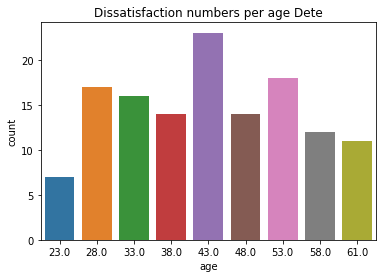

In [51]:
plt.title("Dissatisfaction numbers per age Dete")
sns.countplot(dete_resigned['age'][dete_resigned["dissatisfied"]])

In [38]:
tafe_resigned['age'].value_counts(dropna=False)

NaN              50
41  45           45
51-55            39
46  50           39
21  25           33
31  35           32
36  40           32
26  30           32
56 or older      29
20 or younger     9
Name: age, dtype: int64

In [39]:
age_map2 = {"41  45": 43,           
"51-55": 53, 
"46  50":48 ,  
"21  25" :23,    
"31  35" :33,      
"36  40": 38,    
"26  30" :28 ,       
"56 or older"  :56,
"20 or younger":20  }
tafe_resigned['age'] =tafe_resigned['age'].map(age_map2)
tafe_resigned_ages = tafe_resigned[tafe_resigned["age"].notnull()]

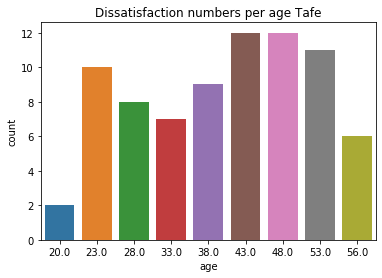

In [47]:
plt.title("Dissatisfaction numbers per age Tafe")
sns.countplot(tafe_resigned_ages['age'][tafe_resigned_ages["dissatisfied"]])

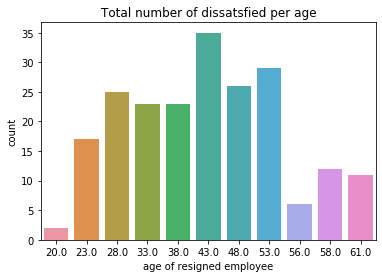

In [73]:
total = tafe_resigned_ages['age'][tafe_resigned_ages["dissatisfied"]].tolist() + dete_resigned['age'][dete_resigned["dissatisfied"]].tolist()
plt.title("Total number of dissatsfied per age")
plt.xlabel("age of resigned employee")
sns.countplot(total)

__Conclusion:__ When we look at the charts we see that people who are dissatisfied mostly are 43 to 53 years old . However in the tafe dats there also appears to be a peak in the youngest group.